In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
non_sarc_df = pd.read_csv("../tf_data/corpora_normal_def.csv",sep=";", encoding='cp1252')

sarc_df = pd.read_csv("../tf_data/corpora_sarcastic_def.csv", sep=";", encoding='cp1252')

In [3]:
non_sarc_df.shape, sarc_df.shape

((9789, 3), (5721, 3))

In [4]:
df = pd.concat([non_sarc_df, sarc_df], axis=0)

In [5]:
df.shape

(15510, 3)

In [6]:
df.head()

,titles,category,Label
0,"Roma, una perdita d’acqua in via del Forte Bra...",cronaca,0
1,"Bari, racket di prostituzione minorile: alle t...",cronaca,0
2,La truffa al figlio di Bruno Giordano: un fals...,cronaca,0
3,"Modena, la ragazzina stuprata a 12 anni e il v...",cronaca,0
4,Fedez denunciato per rissa in discoteca per il...,cronaca,0


C:\Users\harde\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
388/388 - 8s - 21ms/step - accuracy: 0.8172 - loss: 0.3886 - val_accuracy: 0.8740 - val_loss: 0.2899
Epoch 2/10
388/388 - 7s - 17ms/step - accuracy: 0.8890 - loss: 0.2620 - val_accuracy: 0.8946 - val_loss: 0.2512
Epoch 3/10
388/388 - 6s - 17ms/step - accuracy: 0.9010 - loss: 0.2347 - val_accuracy: 0.8959 - val_loss: 0.2570
Epoch 4/10
388/388 - 6s - 16ms/step - accuracy: 0.9087 - loss: 0.2217 - val_accuracy: 0.8959 - val_loss: 0.2516
Epoch 5/10
388/388 - 6s - 16ms/step - accuracy: 0.9100 - loss: 0.2156 - val_accuracy: 0.8862 - val_loss: 0.2665
Epoch 6/10
388/388 - 6s - 15ms/step - accuracy: 0.9105 - loss: 0.2159 - val_accuracy: 0.8930 - val_loss: 0.2521
Epoch 7/10
388/388 - 6s - 15ms/step - accuracy: 0.9138 - loss: 0.2090 - val_accuracy: 0.8936 - val_loss: 0.2587
Epoch 8/10
388/388 - 6s - 15ms/step - accuracy: 0.9153 - loss: 0.2024 - val_accuracy: 0.8920 - val_loss: 0.2513
Epoch 9/10
388/388 - 6s - 16ms/step - accuracy: 0.9164 - loss: 0.1974 - val_accuracy: 0.8943 - val_loss:

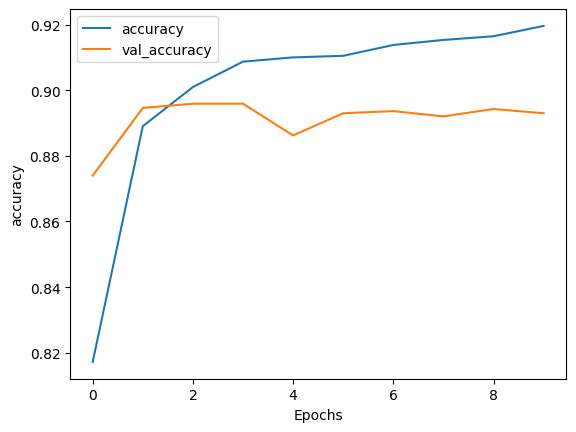

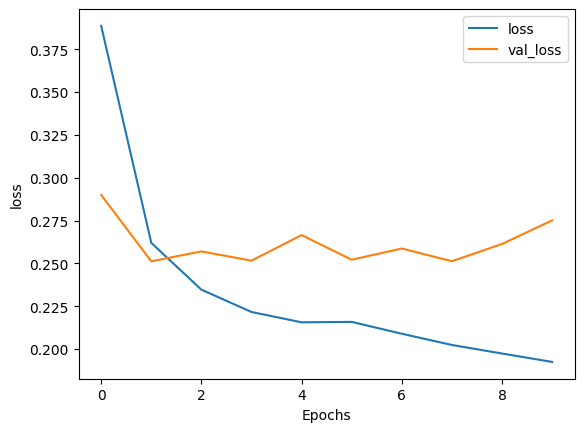

In [7]:
sentences = df['titles'].values
labels = df['Label'].values


# Veriyi eğitim ve test olarak ayırın
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.2)

# Metinleri tokenize edin
vocab_size = 1000
embedding_dim = 16
max_length = 32
trunc_type='post'
padding_type='post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Eğitim ve test verilerini dizilere dönüştürün
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Modeli oluşturun
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modeli derleyin
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitin
num_epochs = 10
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(
    training_padded, training_labels,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    verbose=2
)

# Modeli değerlendirin
loss, accuracy = model.evaluate(testing_padded, testing_labels, verbose=2)
print(f'Test Accuracy: {accuracy}')

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
plt.plot(range(1, num_epochs + 1), epoch_times)
plt.xlabel("Epochs")
plt.ylabel("Time (seconds)")
plt.title("Training Time per Epoch")
plt.show()